In [14]:
import register, imp
imp.reload(register)
import numpy as np
import matplotlib.pyplot as plt
import time


ops = {
        'diameter':10, # this is the main parameter for cell detection
        'tau':  1., # this is the main parameter for deconvolution
        'fs': 10.,  # sampling rate (total across planes)           
        'data_path': 'H:/DATA/2017-10-13/',
        'subfolders': ('4'),
        'nplanes' : 1, # each tiff has these many planes in sequence
        'nchannels' : 1, # each tiff has these many channels per plane  
        'functional_chan' : 1, # this channel is used to extract functional ROIs (1-based)
        'align_by_chan' : 1, # when multi-channel, you can align by non-functional channel (1-based)
        'look_one_level_down': False,        
        'baseline': 'maximin', # baselining mode
        'win_baseline': 60., # window for maximin
        'sig_baseline': 10., # smoothing constant for gaussian filter 
        'prctile_baseline': 8.,# smoothing constant for gaussian filter        
        'neucoeff': .7,  # neuropil coefficient 
        'neumax': 1.,  # maximum neuropil coefficient (not implemented)
        'niterneu': 5, # number of iterations when the neuropil coefficient is estimated (not implemented)
        'maxregshift': 0.,
        'subpixel' : 10,
        'batch_size': 400, # number of frames per batch
        'num_workers': 0, # 0 to select num_cores, -1 to disable parallelism, N to enforce value        
        'nimg_init': 400, # subsampled frames for finding reference image        
      }

In [15]:
import register, imp
imp.reload(register)

ops1 = register.tiff_to_binary(ops)
ops1 = register.register_binary(ops1)

In [98]:
import register, imp
imp.reload(register)

t0 = time.time()
ops1 = register.tiff_to_binary(ops)
ops1 = register.register_binary(ops1)
t1 = time.time()

print(t1-t0)

411.9249255657196


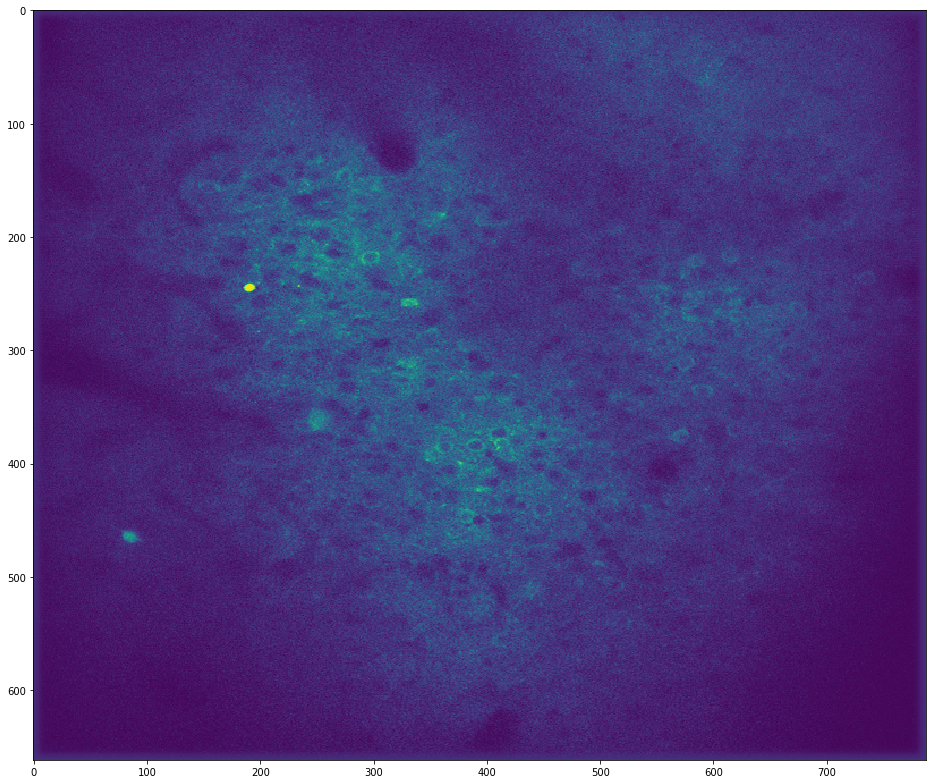

In [13]:
Im = ops1[3]['meanImg']

plt.figure(figsize=(16,16))
plt.imshow(Im)
plt.show()

In [18]:
ops1

{'diameter': 10,
 'tau': 1.0,
 'fs': 10.0,
 'baseline': 'maximin',
 'win_baseline': 60.0,
 'sig_baseline': 10.0,
 'prctile_baseline': 8.0,
 'neucoeff': 0.7,
 'neumax': 1.0,
 'niterneu': 5,
 'maxregshift': 0.0,
 'subpixel': 10,
 'batch_size': 400,
 'num_workers': 0,
 'XYzeroed': False,
 'nimg_init': 400,
 'fold_path': 'H:/DATA/2017-10-13/',
 'reg_file': 'H:/DATA/2017-10-13//suite2p/data.bin',
 'Ly': 662,
 'Lx': 788,
 'nframes': 10000,
 'yoff': array([ 1.7,  1.7,  1.7, ...,  2. ,  1.4, -0.5]),
 'xoff': array([-1.4, -0.7, -1.2, ..., -1. ,  1.3,  1. ]),
 'corrXY': array([0.0191911 , 0.01920671, 0.01899807, ..., 0.01518637, 0.01501464,
        0.01369133]),
 'refImg': array([[1107.9798995 , 1100.50251256, 1086.48743719, ..., 1099.27638191,
         1107.1959799 , 1112.72361809],
        [1109.        , 1093.12060302, 1078.51758794, ..., 1090.        ,
         1103.05025126, 1109.63819095],
        [1094.06030151, 1076.89949749, 1053.05025126, ..., 1074.07537688,
         1094.96482412, 110